# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [2]:
pip install tensorflow numpy matplotlib


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

/Users/amanialshaikh/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. 

Use the input as (32,32,3). 

The filter maps can then be flattened to provide features to the classifier. 

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [3]:
from keras.backend import clear_session
clear_session()

In [4]:
# Your code here :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the Sequential model
model = Sequential()

# Add the convolutional layer (3x3 filter, 32 filters, ReLU activation)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Add the max-pooling layer (2x2 pool size)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers to feed into the dense layers
model.add(Flatten())

# Add a dense layer with 100 units and ReLU activation
model.add(Dense(100, activation='relu'))

# Add the final classification layer with softmax activation (for multi-class classification)
model.add(Dense(10, activation='softmax'))  # Assuming 10 classes (e.g., CIFAR-10)

# Print the model summary to inspect the architecture
model.summary()

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


/Users/amanialshaikh/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

/Users/amanialshaikh/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.1513 - loss: 2.2710 - val_accuracy: 0.2206 - val_loss: 2.1663
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.2553 - loss: 2.1268 - val_accuracy: 0.2976 - val_loss: 2.0312
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.2978 - loss: 2.0081 - val_accuracy: 0.3099 - val_loss: 1.9633
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.3227 - loss: 1.9388 - val_accuracy: 0.3319 - val_loss: 1.9061
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.3396 - loss: 1.8980 - val_accuracy: 0.3488 - val_loss: 1.8734
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.3543 - loss: 1.8647 - val_accuracy: 0.3611 - val_loss: 1.8392
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.3598 - loss: 1.8384 - val_accuracy: 0.3695 - val_loss: 1.8200
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.3737 - loss: 1.8041 - val_accuracy: 0.3736 - v

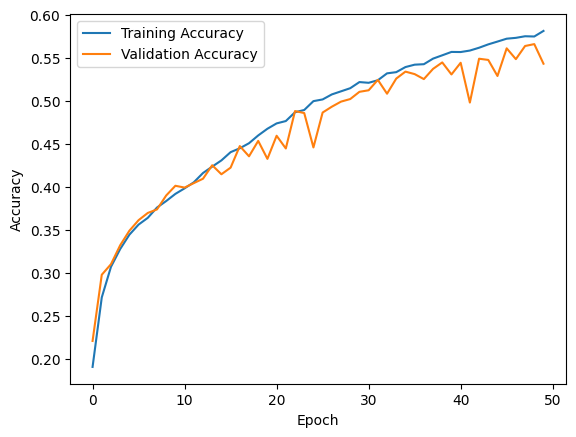

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to range [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# Initialize the model
model = Sequential()

# Add the convolutional layer (3x3 filter, 32 filters, ReLU activation)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Add the max-pooling layer (2x2 pool size)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers to feed into the dense layers
model.add(Flatten())

# Add a dense layer with 100 units and ReLU activation
model.add(Dense(100, activation='relu'))

# Add the final classification layer with softmax activation (10 classes)
model.add(Dense(10, activation='softmax'))

# Compile the model with SGD optimizer and categorical_crossentropy loss
model.compile(optimizer=SGD(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model for 50 epochs with a batch size of 512
history = model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Optionally plot training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




              


*   Plot the cross entropy loss curve and the accuracy curve

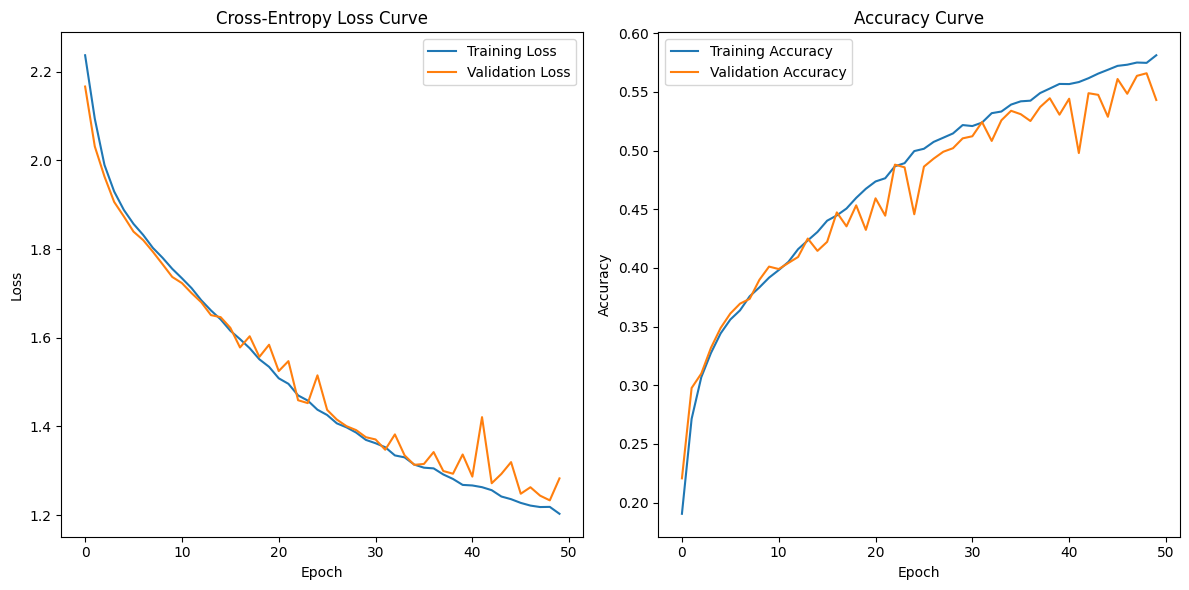

In [8]:
# Your code here :
import matplotlib.pyplot as plt

# Plot the cross-entropy loss curve
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Cross-Entropy Loss Curve')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [9]:
from keras.backend import clear_session
clear_session()

In [10]:
# Your code here :
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the VGG-like model for CIFAR-10
model = models.Sequential()

# Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))

# Convolutional Layer 2
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))

# Max-Pooling Layer
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the previous layer
model.add(layers.Flatten())

# Dense Layer with 128 units
model.add(layers.Dense(128, activation='relu'))

# Output Layer with 10 units (for CIFAR-10 classes) and softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Print model summary
model.summary()

# Compile the model with categorical cross-entropy loss, SGD optimizer, and accuracy metric
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Now, let's train the model on CIFAR-10 data
# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the image data to [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 181ms/step - accuracy: 0.1466 - loss: 2.2781 - val_accuracy: 0.2029 - val_loss: 2.1785
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 182ms/step - accuracy: 0.2391 - loss: 2.1377 - val_accuracy: 0.2990 - val_loss: 2.0189
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 186ms/step - accuracy: 0.2866 - loss: 2.0147 - val_accuracy: 0.3307 - val_loss: 1.9233
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 186ms/step - accuracy: 0.3146 - loss: 1.9391 - val_accuracy: 0.3352 - val_loss: 1.8776
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - accuracy: 0.3369 - loss: 1.8894 - val_accuracy: 0.3551 - val_loss: 1.8314
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 196ms/step - accuracy: 0.3535 - loss: 1.8398 - val_accuracy: 0.3602 - val_loss: 1.8345
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 192ms/step - accuracy: 0.3723 - loss: 1.7955 - val_accuracy: 0.3894 - val_loss: 1.7434
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 194ms/step - accuracy: 0.3846 - loss: 1.7515 - val_accu

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [11]:
# Your code here : 
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the VGG-like model for CIFAR-10
model = models.Sequential()

# Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))

# Convolutional Layer 2
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))

# Max-Pooling Layer
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the previous layer
model.add(layers.Flatten())

# Dense Layer with 128 units
model.add(layers.Dense(128, activation='relu'))

# Output Layer with 10 units (for CIFAR-10 classes) and softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model with categorical cross-entropy loss, SGD optimizer, and accuracy metric
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Print model summary
model.summary()

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the image data to [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 180ms/step - accuracy: 0.1594 - loss: 2.2688 - val_accuracy: 0.2222 - val_loss: 2.1711
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 184ms/step - accuracy: 0.2326 - loss: 2.1367 - val_accuracy: 0.2841 - val_loss: 2.0392
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 188ms/step - accuracy: 0.2802 - loss: 2.0301 - val_accuracy: 0.3083 - val_loss: 1.9855
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 190ms/step - accuracy: 0.3149 - loss: 1.9514 - val_accuracy: 0.3457 - val_loss: 1.8769
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 195ms/step - accuracy: 0.3398 - loss: 1.8893 - val_accuracy: 0.3413 - val_loss: 1.8608
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 196ms/step - accuracy: 0.3593 - loss: 1.8362 - val_accuracy: 0.3544 - val_loss: 1.8432
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 197ms/step - accuracy: 0.3745 - loss: 1.7906 - val_accuracy: 0.3798 - val_loss: 1.7651
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 198ms/step - accuracy: 0.3861 - loss: 1.7554 - val_accu

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

NameError: name 'history_simple_model' is not defined

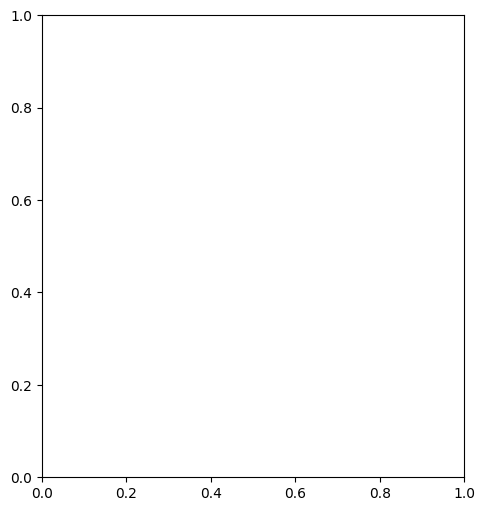

In [12]:
# Your code here :
import matplotlib.pyplot as plt

# Plotting the loss curve
plt.figure(figsize=(12, 6))

# Loss plot for simpler model
plt.subplot(1, 2, 1)
plt.plot(history_simple_model.history['loss'], label='Training Loss (Simple Model)')
plt.plot(history_simple_model.history['val_loss'], label='Validation Loss (Simple Model)')
plt.title('Loss Curve: Simple Model vs VGG Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Loss plot for VGG model
plt.subplot(1, 2, 2)
plt.plot(history_vgg_model.history['loss'], label='Training Loss (VGG Model)')
plt.plot(history_vgg_model.history['val_loss'], label='Validation Loss (VGG Model)')
plt.title('Loss Curve: Simple Model vs VGG Model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Plotting the accuracy curve
plt.figure(figsize=(12, 6))

# Accuracy plot for simpler model
plt.subplot(1, 2, 1)
plt.plot(history_simple_model.history['accuracy'], label='Training Accuracy (Simple Model)')
plt.plot(history_simple_model.history['val_accuracy'], label='Validation Accuracy (Simple Model)')
plt.title('Accuracy Curve: Simple Model vs VGG Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Accuracy plot for VGG model
plt.subplot(1, 2, 2)
plt.plot(history_vgg_model.history['accuracy'], label='Training Accuracy (VGG Model)')
plt.plot(history_vgg_model.history['val_accuracy'], label='Validation Accuracy (VGG Model)')
plt.title('Accuracy Curve: Simple Model vs VGG Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


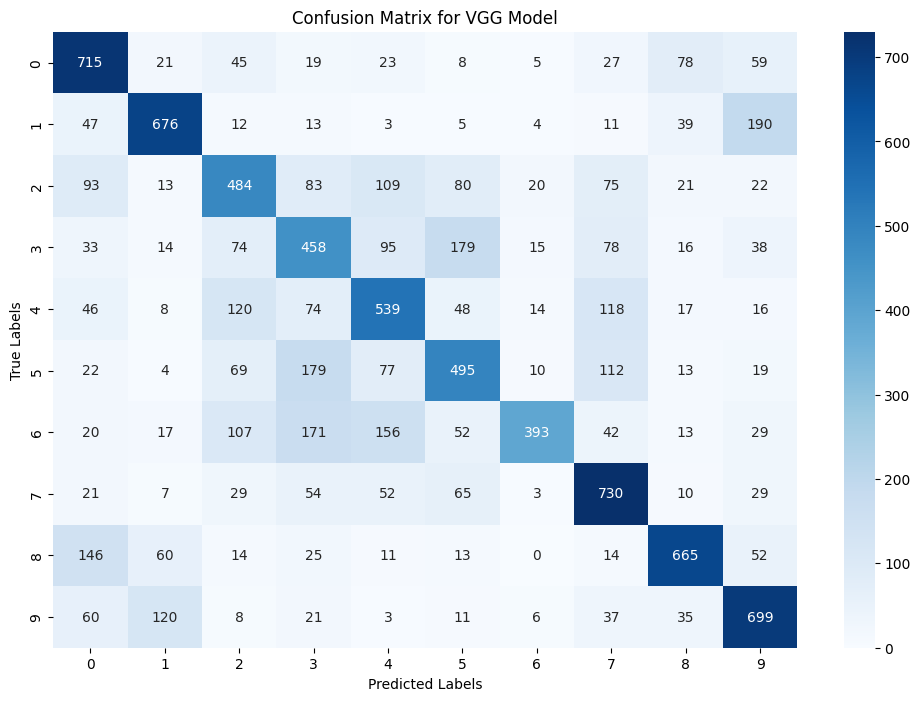

In [14]:
# Assuming the trained model is named 'model' (or replace 'model' with the actual name of your model)
y_pred = model.predict(X_test)

# Convert the predicted and true labels to class indices (flattened)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = y_test.flatten()

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title('Confusion Matrix for VGG Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

plt.show()


**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [16]:
# Your code here :
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

# Print the test accuracy
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 10)

## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [15]:
from keras.backend import clear_session
clear_session()

In [17]:
# Your code here :
from tensorflow.keras import layers, models

# Define the VGG model architecture
def build_vgg_model(input_shape=(64, 64, 3)):
    model = models.Sequential()
    
    # First block: Convolutional layers with 64 filters
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    # Second block: Convolutional layers with 128 filters
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    # Third block: Convolutional layers with 256 filters
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    # Flatten the output from convolutional layers
    model.add(layers.Flatten())
    
    # Dense layer with 128 units
    model.add(layers.Dense(128, activation='relu'))
    
    # Output layer with 10 classes (for CIFAR-10 dataset)
    model.add(layers.Dense(10, activation='softmax'))
    
    return model

# Build the model
model_vgg_complete = build_vgg_model(input_shape=(64, 64, 3))

# Compile the model
model_vgg_complete.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model architecture
model_vgg_complete.summary()


/Users/amanialshaikh/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [21]:
pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.3 MB 2.2 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import cv2  # Ensure to install OpenCV if it's not installed

# Define the complete VGG architecture
model_vgg_complete = models.Sequential()

# Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.
model_vgg_complete.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model_vgg_complete.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_vgg_complete.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling.
model_vgg_complete.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_vgg_complete.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_vgg_complete.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Stack two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.
model_vgg_complete.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model_vgg_complete.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model_vgg_complete.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.
model_vgg_complete.add(layers.Flatten())
model_vgg_complete.add(layers.Dense(128, activation='relu'))

# Output classification layer with 10 classes
model_vgg_complete.add(layers.Dense(10, activation='softmax'))

# Compile the model using categorical_crossentropy loss, SGD optimizer, and accuracy as metric
model_vgg_complete.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocess the data: Resize images to 64x64 and normalize
X_train = np.array([cv2.resize(img, (64, 64)) for img in X_train])  # Resize images to 64x64
X_test = np.array([cv2.resize(img, (64, 64)) for img in X_test])    # Resize images to 64x64
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Train the model for 10 epochs with a batch size of 512
history = model_vgg_complete.fit(X_train, y_train, epochs=10, batch_size=512, validation_data=(X_test, y_test))

# Predict the output for the test split
y_pred = model_vgg_complete.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for VGG Model')
plt.show()

# Print the test accuracy for the trained model
test_loss, test_acc = model_vgg_complete.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 909s 9s/step - accuracy: 0.1006 - loss: 2.3013 - val_accuracy: 0.1044 - val_loss: 2.2950
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1003s 10s/step - accuracy: 0.1155 - loss: 2.2918 - val_accuracy: 0.1484 - val_loss: 2.2760
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 3019s 31s/step - accuracy: 0.1678 - loss: 2.2623 - val_accuracy: 0.2135 - val_loss: 2.1727
Epoch 4/10
92/98 ━━━━━━━━━━━━━━━━━━━━ 49s 8s/step - accuracy: 0.2266 - loss: 2.1574

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:



_

2 - Key Differences between sigmoid and softmax:



_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:


_
